In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [42]:
data22 = pd.read_excel('/workspaces/projects/TTC_Delay_Analysis/Notebook/ttc-bus-delay-data-2022.xlsx')
data23 = pd.read_excel('/workspaces/projects/TTC_Delay_Analysis/Notebook/ttc-bus-delay-data-2023.xlsx')

In [43]:
data = pd.concat([data22, data23], axis=0)
data

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0
...,...,...,...,...,...,...,...,...,...,...
50908,2023-11-30,84,00:01,Thursday,SHEPPARD-YONGE STATION,Mechanical,10,20,E,3581
50909,2023-11-30,960,00:25,Thursday,STEELES AND GERRY FITZ,Mechanical,24,48,E,8390
50910,2023-11-30,116,00:44,Thursday,KENNEDY STATION,Cleaning - Unsanitary,10,20,W,1652
50911,2023-11-30,7,00:48,Thursday,FISHERVILLE AND BATHUR,Operations - Operator,11,21,N,8192


In [44]:
incident_mapping = {
    'Operations - Operator': 'Operation',
    'Cleaning - Disinfection': 'Operation',
    'Cleaning - Unsanitary': 'Operation',
    'Late Entering Service': 'Operation',
    'Collision - TTC': 'Collision',
    'Road Blocked - NON-TTC Collision': 'Collision',
    'Security': 'Security',
    'Emergency Services': 'Security',
    'Investigation': 'Security',
    'Held By': 'Security',
    'Mechanical': 'Mechanical',
    'Diversion': 'Summer',
    'Utilized Off Route': 'Diversion',
    'Vision': 'Weather and Other',
    'General Delay': 'Weather and Other'
}

# Apply the mapping to create a new 'Incident_Category' column
data['Incident'] = data['Incident'].map(incident_mapping)
data['Incident'].value_counts()

Incident
Mechanical           33996
Operation            33166
Security             15247
Collision             7974
Weather and Other     7565
Summer                6306
Diversion             5366
Name: count, dtype: int64

In [45]:
data

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,Weather and Other,0,0,NaN,8531
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Summer,131,161,W,8658
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operation,17,20,S,0
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operation,4,11,S,0
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operation,4,8,S,0
...,...,...,...,...,...,...,...,...,...,...
50908,2023-11-30,84,00:01,Thursday,SHEPPARD-YONGE STATION,Mechanical,10,20,E,3581
50909,2023-11-30,960,00:25,Thursday,STEELES AND GERRY FITZ,Mechanical,24,48,E,8390
50910,2023-11-30,116,00:44,Thursday,KENNEDY STATION,Operation,10,20,W,1652
50911,2023-11-30,7,00:48,Thursday,FISHERVILLE AND BATHUR,Operation,11,21,N,8192


In [46]:
data.dropna(inplace=True)
data

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Summer,131,161,W,8658
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operation,17,20,S,0
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operation,4,11,S,0
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operation,4,8,S,0
6,2022-01-01,96,02:18,Saturday,HUMBERLINE LOOP,Security,0,0,N,3536
...,...,...,...,...,...,...,...,...,...,...
50908,2023-11-30,84,00:01,Thursday,SHEPPARD-YONGE STATION,Mechanical,10,20,E,3581
50909,2023-11-30,960,00:25,Thursday,STEELES AND GERRY FITZ,Mechanical,24,48,E,8390
50910,2023-11-30,116,00:44,Thursday,KENNEDY STATION,Operation,10,20,W,1652
50911,2023-11-30,7,00:48,Thursday,FISHERVILLE AND BATHUR,Operation,11,21,N,8192


In [47]:
data = data[['Date','Route','Time','Day','Incident','Min Delay','Min Gap','Direction','Vehicle']]

In [48]:
# Step 1: Convert 'Date' and 'Time' columns to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Step 2: Extract the month number from the 'Date' column
data['Month'] = data['Date'].dt.month

# Step 3: Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Step 4: Convert the 'Date' column to epoch time
data['Epoch Time'] = data['Date'].astype(int) // 10**9

# Step 5: Convert the 'Route' column to categorical data
data['Route'] = data['Route'].astype('category')

/tmp/ipykernel_40941/3163785194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [49]:
data['Day'] = pd.to_datetime(data['Day'], format='%A').dt.dayofweek

data['Part of Day'] = pd.to_datetime(data['Time']).dt.hour.apply(
    lambda x: 'Night' if 0 <= x < 6 else
              'Morning' if 6 <= x < 12 else
              'Afternoon' if 12 <= x < 18 else
              'Evening'
)

/tmp/ipykernel_40941/3045946958.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Part of Day'] = pd.to_datetime(data['Time']).dt.hour.apply(


In [50]:
data

,Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle,Month,Year,Epoch Time,Part of Day
1,2022-01-01,325,02:00,0,Summer,131,161,W,8658,1,2022,1640995200,Night
2,2022-01-01,320,02:00,0,Operation,17,20,S,0,1,2022,1640995200,Night
3,2022-01-01,320,02:07,0,Operation,4,11,S,0,1,2022,1640995200,Night
4,2022-01-01,320,02:13,0,Operation,4,8,S,0,1,2022,1640995200,Night
6,2022-01-01,96,02:18,0,Security,0,0,N,3536,1,2022,1640995200,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50908,2023-11-30,84,00:01,0,Mechanical,10,20,E,3581,11,2023,1701302400,Night
50909,2023-11-30,960,00:25,0,Mechanical,24,48,E,8390,11,2023,1701302400,Night
50910,2023-11-30,116,00:44,0,Operation,10,20,W,1652,11,2023,1701302400,Night
50911,2023-11-30,7,00:48,0,Operation,11,21,N,8192,11,2023,1701302400,Night


In [51]:
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))

In [52]:
data

,Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle,Month,Year,Epoch Time,Part of Day,Datetime
1,2022-01-01,325,02:00,0,Summer,131,161,W,8658,1,2022,1640995200,Night,2022-01-01 02:00:00
2,2022-01-01,320,02:00,0,Operation,17,20,S,0,1,2022,1640995200,Night,2022-01-01 02:00:00
3,2022-01-01,320,02:07,0,Operation,4,11,S,0,1,2022,1640995200,Night,2022-01-01 02:07:00
4,2022-01-01,320,02:13,0,Operation,4,8,S,0,1,2022,1640995200,Night,2022-01-01 02:13:00
6,2022-01-01,96,02:18,0,Security,0,0,N,3536,1,2022,1640995200,Night,2022-01-01 02:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50908,2023-11-30,84,00:01,0,Mechanical,10,20,E,3581,11,2023,1701302400,Night,2023-11-30 00:01:00
50909,2023-11-30,960,00:25,0,Mechanical,24,48,E,8390,11,2023,1701302400,Night,2023-11-30 00:25:00
50910,2023-11-30,116,00:44,0,Operation,10,20,W,1652,11,2023,1701302400,Night,2023-11-30 00:44:00
50911,2023-11-30,7,00:48,0,Operation,11,21,N,8192,11,2023,1701302400,Night,2023-11-30 00:48:00


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.trend import ADXIndicator

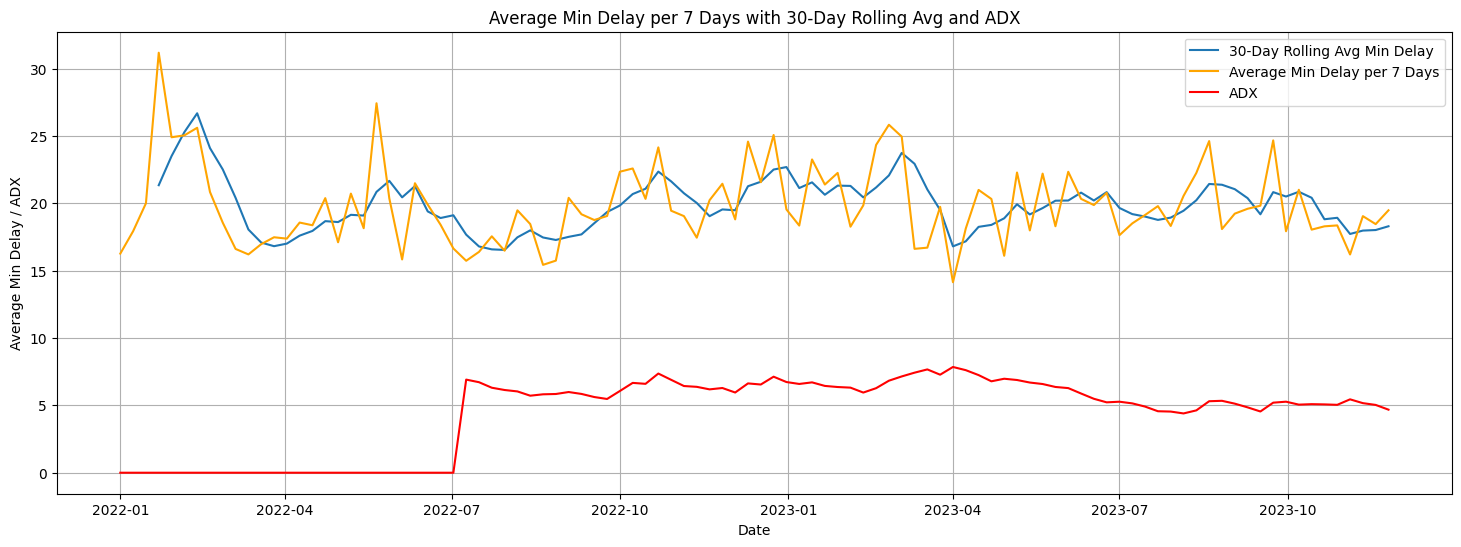

In [68]:
avg_delay_per_7_days = data.resample('7D', on='Date')['Min Delay'].mean()

# Calculate the 30-day rolling average
rolling_avg_30_days = avg_delay_per_7_days.rolling(window=4).mean()

# Calculate ADX (Average Directional Index)
adx_indicator = ADXIndicator(high=avg_delay_per_7_days, low=avg_delay_per_7_days, close=avg_delay_per_7_days, window=14)
adx_values = adx_indicator.adx()

# Plotting
plt.figure(figsize=(18, 6))

# Plot 30-day rolling average
plt.plot(rolling_avg_30_days.index, rolling_avg_30_days.values, label='30-Day Rolling Avg Min Delay')

# Plot Average Min Delay per 7-day period
plt.plot(avg_delay_per_7_days.index, avg_delay_per_7_days.values, label='Average Min Delay per 7 Days', color ='orange')

# Plot ADX
plt.plot(adx_values.index, adx_values.values, label='ADX', color='red')

plt.title('Average Min Delay per 7 Days with 30-Day Rolling Avg and ADX')
plt.xlabel('Date')
plt.ylabel('Average Min Delay / ADX')
plt.legend()
plt.grid(True)
plt.show()